<a href="https://colab.research.google.com/github/josearangos/Default-of-credit-card-client/blob/master/P2_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle** kernels: https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook



Sobre Matrix de confusion y selección de variables 
https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models


# **Experimentos**

Incluya una sesion dentro de su informe con el nombre Experimentos, en la cual describa la metodología de validacion usada y la base de datos que est  ́ a usandó para llevar a cabo el proyecto, incluyendo la fuente de la base de datos como referencia, el numero de muestras,variables, etc. Si su problema es de clasificacion, indique cuantas clases contiene la basa de datos y cu  ́ antas muestras por clase. Si la base de datos esta desbalanceada,deben considerar el uso de tecnicas de submuestreo y sobremuestreo inteligente, ademas de usar validacíón ́estratificaida.

In [0]:
from pandas import DataFrame, read_csv
import pickle
from sklearn.externals import joblib #Guardar modelos una vez entrenados
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

PATH = '/content/drive/My Drive/2019-1/Simulation of System and Laboratory/Final Project/Code/'

In [0]:
file = PATH+'UCI_Credit_Card.csv'
df = pd.read_csv(file)

# Sobre la base de datos

In [0]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Cantidad de muestras**

In [13]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
data = df.values
data.shape

(30000, 25)

Cantidad de clases

In [0]:
len(np.unique(df.def_pay))

2

Muestras por clases

In [0]:
classes = np.unique(df.def_pay)
unicos = data[:,-1]
unos = np.where(unicos == 1)
lenU =len(unos[0])
cero = np.where(unicos == 0)
lenC=len(cero[0])
print("Clase (1):",lenU)
print("Clase (0):",lenC)

Clase (1): 6636
Clase (0): 23364


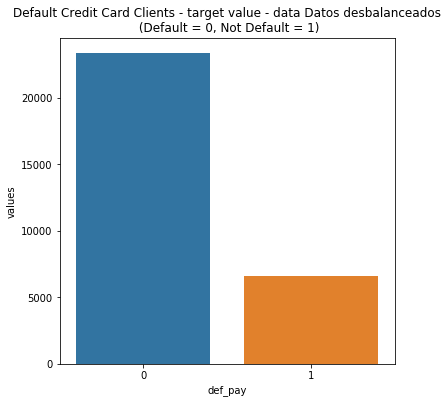

In [14]:
temp = df['def_pay'].value_counts()
df2 = pd.DataFrame({'def_pay': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data Datos desbalanceados\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'def_pay', y="values", data=df2)
locs, labels = plt.xticks()
plt.show()

Cantidad de variables y su significado

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
def_pay      30000 non-null int64
dtypes: float64

**Creamos la variable a predecir**

In [0]:
Y = df['def_pay'].copy()
Y = Y.values

**Creamos La matriz de características**

In [0]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df[features].copy()
X = X.values


# **Tecnicas de Balanceo Usada**

Si la base de datos esta desbalanceada,deben considerar el uso de tecnicas de submuestreo y sobremuestreo inteligente, ademas de usar validacíón ́estratificaida.

## **Stratified KFold**

In [0]:
from sklearn.model_selection import StratifiedKFold

#Train, Validation, Test
FOLDS = 10

skf = StratifiedKFold(n_splits=FOLDS)
for train_index, test_index in skf.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
  



TRAIN: [ 2993  2995  2996 ... 29997 29998 29999] TEST: [   0    1    2 ... 3004 3005 3006]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [2993 2995 2996 ... 6044 6045 6047]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [5985 5988 5989 ... 9034 9035 9036]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [ 8883  8886  8888 ... 12051 12052 12055]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [11794 11796 11802 ... 15072 15073 15074]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [14766 14770 14778 ... 18223 18224 18226]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [17316 17319 17323 ... 21199 21200 21201]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [20429 20437 20439 ... 24073 24074 24075]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [23691 23696 23704 ... 26998 26999 27000]
TRAIN: [    0     1     2 ... 26998 26999 27000] TEST: [27001 27002 27003 ... 29997 29998 29999]


## **Validación Booststrapping**

In [0]:
from sklearn.model_selection import train_test_split
VALID_SIZE = 0.20
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=VALID_SIZE, shuffle=True )
print('X_Train', X_train.shape)
print('y_train', y_train.shape)


X_Train (24000, 23)
y_train (24000,)


## **Aprendizaje con balance de costo**

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y),Y)
class_weights
#model.fit(X_train, y_train, class_weight=class_weights)


array([0.64201335, 2.26039783])

## **Stratified KFold con Class_weight** 

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight


#Train, Validation, Test
FOLDS = 10

skf = StratifiedKFold(n_splits=FOLDS)
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]    
    print("xTRAIN:", X_train.shape, "yTRAIN:", Y_train.shape)
    print("xTEST:", X_test.shape, "yTEST:", Y_test.shape)
    class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
    class_weightsTest = class_weight.compute_class_weight('balanced',np.unique(Y_test),Y_test)
    print("class_weightsTrain",(class_weightsTrain[1]))
    print("class_weightsTest",class_weightsTest)   


xTRAIN: (26999, 23) yTRAIN: (26999,)
xTEST: (3001, 23) yTEST: (3001,)
class_weightsTrain 2.2604655056932352
class_weightsTest [0.64206247 2.25978916]
xTRAIN: (26999, 23) yTRAIN: (26999,)
xTEST: (3001, 23) yTEST: (3001,)
class_weightsTrain 2.2604655056932352
class_weightsTest [0.64206247 2.25978916]
xTRAIN: (26999, 23) yTRAIN: (26999,)
xTEST: (3001, 23) yTEST: (3001,)
class_weightsTrain 2.2604655056932352
class_weightsTest [0.64206247 2.25978916]
xTRAIN: (26999, 23) yTRAIN: (26999,)
xTEST: (3001, 23) yTEST: (3001,)
class_weightsTrain 2.2604655056932352
class_weightsTest [0.64206247 2.25978916]
xTRAIN: (27000, 23) yTRAIN: (27000,)
xTEST: (3000, 23) yTEST: (3000,)
class_weightsTrain 2.260549229738781
class_weightsTest [0.64212329 2.25903614]
xTRAIN: (27000, 23) yTRAIN: (27000,)
xTEST: (3000, 23) yTEST: (3000,)
class_weightsTrain 2.260549229738781
class_weightsTest [0.64212329 2.25903614]
xTRAIN: (27001, 23) yTRAIN: (27001,)
xTEST: (2999, 23) yTEST: (2999,)
class_weightsTrain 2.26025447848

# **Normalización**

## **StandardScaler**

The standard score of a sample x is calculated as:

z = (x - u) / s

La idea detrás de StandardScaler es que transformará sus datos de modo que su distribución tenga un valor medio 0 y una desviación estándar de 1.




In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

XnormalizeAux = X[:,[0,11,12,13,14,15,16,17,18,19,20,21,22]]
XnormalizeAux = scaler.fit_transform(XnormalizeAux)

Xnormalize = X.copy()
Xnormalize[:,0]=XnormalizeAux[:,0]
Xnormalize[:,11:22]=XnormalizeAux[:,1:12]

print(Xnormalize.shape)



# En Xnormalize esta las característica normalizadas

(30000, 23)


# Modelos

# **Usando GridSearchCV**

In [0]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight

def modelTrain(model,params,X,Y,VALID_SIZE,FOLDS):
    skf = StratifiedKFold(n_splits=FOLDS)
    gs = GridSearchCV(model, cv=skf, param_grid=params, return_train_score=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=VALID_SIZE, shuffle=True )
    class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
    gs.fit(X_train, y_train)  
    gs.score(X_test, y_test)
    return gs

## **Na ̈ıve Bayes**

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
VALID_SIZE = 0.20
FOLDS = 10
params = {}
gsGaussianNB = modelTrain(gnb,params,X,Y,VALID_SIZE,FOLDS)


#GUARDAR MODELO
#joblib.dump(gsGaussianNB, PATH+'Models/gsGaussianNB.pkl')


In [0]:
PATHGNBMODEL = PATH+'Models/gsGaussianNB.pkl'
gsGaussianNB = joblib.load(PATHGNBMODEL)
print(gsGaussianNB.best_score_)

### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.

In [0]:
print("Best SCORE",gsGaussianNB.best_score_)


Best SCORE 0.77425


Matriz de confusión



 ---




## K vecinos mas cercanos

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

VALID_SIZE = 0.20
FOLDS = 10
params = {
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'metric':['minkowski','euclidean','manhattan']
    
    
}
KNN = KNeighborsClassifier()


gsKNN = modelTrain(KNN,params,X,Y,VALID_SIZE,FOLDS)
print("Best SCORE",gsKNN.best_score_)
print("Best ESTIMATOR", gsKNN.gsGaussianNB.best_params_)

#GUARDAR MODELO
PATH_knn_MODEL = PATH+'Models/gsKNN.pkl'
joblib.dump(gsKNN,PATH_knn_MODEL)

### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.



---




## **Redes Neuronales Artificiales**

### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.



 ---




## **Random Forest**

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [0]:
from sklearn.ensemble import RandomForestClassifier

VALID_SIZE = 0.20
FOLDS = 10

params = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier()
gsRDF= modelTrain(rfc,params,X,Y,VALID_SIZE,FOLDS)

print("Best SCORE",gsRDF.best_score_)
print("Best ESTIMATOR", gsRDF.best_params_)


#GUARDAR MODELO
PATH_gsRDF_MODEL = PATH+'Models/gsRDF.pkl'
joblib.dump(gsRDF,PATH_gsRDF_MODEL)


### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.



 ---




## **Maquinas de Soporte Vectorial con kernel lineal y con kernel RBF.**

In [0]:
from sklearn.svm import SVC

VALID_SIZE = 0.20
FOLDS = 10

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['rbf','linear']

params = {'C': Cs, 'gamma' : gammas,'kernel':kernels}
svm = SVC()
gsSVM = modelTrain(svm,params,X,Y,VALID_SIZE,FOLDS)

print("Best SCORE",gsSVM.best_score_)
print("Best ESTIMATOR", gsSVM.best_params_)



#GUARDAR MODELO
PATH_svm_MODEL = PATH+'Models/gsSVM.pkl'
joblib.dump(gsSVM,PATH_svm_MODEL)


### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.



 ---


